### Image Classification with Pytorch  
Digital image classification uses the spectral information represented by the digital numbers in one or more spectral bands, and attempts to classify each individual pixel based on this spectral information. This type of classification is termed spectral pattern recognition  
  
Let's start with set some settings:  
- set the url  
- set the file path and file name  
- create request with `urllib.request`

In [11]:
import torch

torch.__version__

'1.13.0+cu117'

In [6]:
import urllib.request

url = 'https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg'
file_name = '../Images/kerata.jpg'

urllib.request.urlretrieve(url, file_name)

('../Images/kerata.jpg', <http.client.HTTPMessage at 0x1c423bf04f0>)

### Display the Image  
We got our dog whose name is Kerata.  
  
Display Kerata with Matplotlib and Pillow. We know Kerata is a dog, but how come the machine can (PC) know Kerata is a dog.  

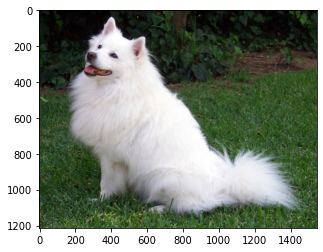

In [5]:
import matplotlib.pyplot as plt 
from PIL import Image

image = Image.open('../Images/kerata.jpg')
plt.imshow(image)

### Preprocessing  
Our purpose is make machine know Kerata is a dog.  
  
First we shoul preprocessing the Kerata's image. Kerata's photo format is RGB this mean the photo is colorful and photo's size is like 1500x1200.  
  
Preprocessing name is *"Transforms"* in Pytorch.

In [10]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

img_tensor = preprocess(image)
img_tensor.shape

torch.Size([3, 224, 224])

### Why use batches?  
The batch size is a number of samples processed before the model is updated.  
  
Batches can help you shorten training times since you will be processing multiple images at once and updating the network according to the loss in all of them. This way, the network may be able to update itself better according to the task since it will be looking at multiple examples of the input at the same time  

In [12]:
batch = img_tensor.unsqueeze(0)
batch.shape

torch.Size([1, 3, 224, 224])

as you can see our data (Kerata) has;  
- 1 batch  
- 3 channel  
- 224x224 px size  

### Model  
Now, Kerata is ready to get in the neural network.  
  
At this point training a model from scratch may be expensive and may take a time. We can use already trained models from Pytorch's own store instead of training a model from scratch.  
  
Let's use **"Alexnet"** model that was winner of the Image Net Competition on 2012.

In [13]:
from torchvision import models

model = models.alexnet(pretrained=True)

c:\Users\ramaz\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ramaz\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\ramaz/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Model is ready.  
  
Now lets set our device choice to GPU, if there is a GPU that we can use for the training or another things, otherwise we will use CPU.  
  
**Why GPU is important for image classification?**  
  
GPU architecture allows parallel processing of image pixels which, in turn, leads to a reduction of the processing time for a single image (latency)  

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)

y = model(batch.to(device))

y.shape

torch.Size([1, 1000])

**Reading Output:**  
- 1 Batch size  
- 1000 is classification number 

### Models architecture:

In [15]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [18]:
y_max, index = torch.max(y, 1)

print(index, y_max)

tensor([258]) tensor([16.8252], grad_fn=<MaxBackward0>)


**Reading Output:**  
Our model found the maximum 16.8252 value to 258th index.  
  
But we don't know what is the 258th indexes name. Lets pull names from the pytorch site.

In [19]:
url2 = 'http://pytorch.tips/imagenet-labels'

file_path2 = "../Datasets/imagenet_class_labels.txt"

urllib.request.urlretrieve(url2, file_path2)

('../Datasets/imagenet_class_labels.txt',
 <http.client.HTTPMessage at 0x1c430f6e6b0>)

In [21]:
with open('../Datasets/imagenet_class_labels.txt') as f:
    classes = [line.strip() for line in f.readlines()]

# 258th index 
classes[258]

"258: 'Samoyed, Samoyede',"

**Reading Output:**  
- Our dogs Kerata's genus is Samoyed.  
  
We learned the genus but what is the accuracy?  

In [25]:
acc = torch.nn.functional.softmax(y, dim=1)[0] * 100

print(classes[index[0]], acc[index[0]].item())

258: 'Samoyed, Samoyede', 72.44771575927734


Sorting the predictions accuracy decreasing: 

In [27]:
_ , indeces = torch.sort(y, descending=True)

for i in indeces[0][:5]:
    print(classes[i], acc[i].item())

258: 'Samoyed, Samoyede', 72.44771575927734
104: 'wallaby, brush kangaroo', 13.937780380249023
259: 'Pomeranian', 5.874992847442627
332: 'Angora, Angora rabbit', 2.2829809188842773
279: 'Arctic fox, white fox, Alopex lagopus', 1.2450194358825684


### Results:  
Model that is alexnet is guessed our dog Kerata's genue to Samoyede with 72.44% accuracy.